In [99]:
import warnings;
warnings.simplefilter('ignore')

In [100]:
!pip install pystan
!pip install prophet

In [101]:
import pandas as pd
from prophet import Prophet
import datetime

In [102]:
df = pd.read_csv('Electric_Production.csv.xls')

In [103]:
df['DATE'] = df['DATE'].astype('string')
df['DATE'] = df['DATE'].str.replace('/', '')
df['DATE'] = df['DATE'].astype(int)

In [104]:
df['Year'] = df['DATE'].apply(lambda x: str(x)[-4:])
df['Month'] = df['DATE'].apply(lambda x: str(x)[-6] if len(str(x)) == 6 else str(x)[:2])
df['Day'] = df['DATE'].apply(lambda x: str(x)[-5])

In [105]:
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [106]:
df.drop(['DATE','Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [107]:
m = Prophet(interval_width=0.95)
model = m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9cqj828/v0giypxu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf9cqj828/otswab6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63589', 'data', 'file=/tmp/tmpf9cqj828/v0giypxu.json', 'init=/tmp/tmpf9cqj828/otswab6r.json', 'output', 'file=/tmp/tmpf9cqj828/prophet_modelqr8bn8ly/prophet_model-20241112034958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:49:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:49:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [108]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,61.420306,68.713853,80.284030,61.420306,61.420306,13.017933,13.017933,13.017933,13.017933,13.017933,13.017933,0.0,0.0,0.0,74.438239
1,1985-02-01,61.602727,60.844215,71.924426,61.602727,61.602727,4.613392,4.613392,4.613392,4.613392,4.613392,4.613392,0.0,0.0,0.0,66.216118
2,1985-03-01,61.767493,55.022189,66.114088,61.767493,61.767493,-0.932530,-0.932530,-0.932530,-0.932530,-0.932530,-0.932530,0.0,0.0,0.0,60.834963
3,1985-04-01,61.949914,46.721227,57.452347,61.949914,61.949914,-9.538543,-9.538543,-9.538543,-9.538543,-9.538543,-9.538543,0.0,0.0,0.0,52.411370
4,1985-05-01,62.126450,47.339264,58.285293,62.126450,62.126450,-9.312000,-9.312000,-9.312000,-9.312000,-9.312000,-9.312000,0.0,0.0,0.0,52.814450


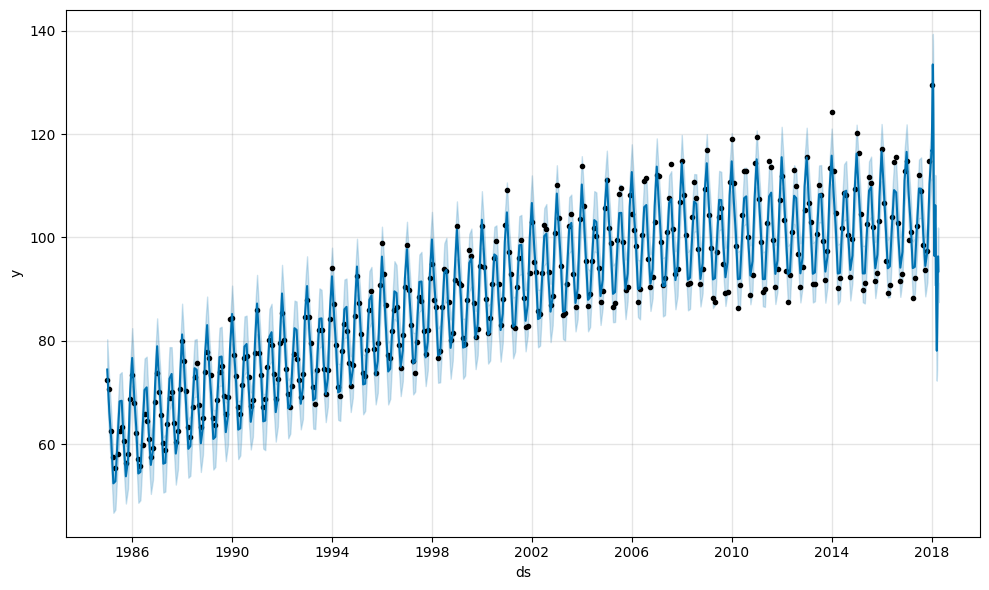

In [109]:
plot1 = m.plot(forecast)

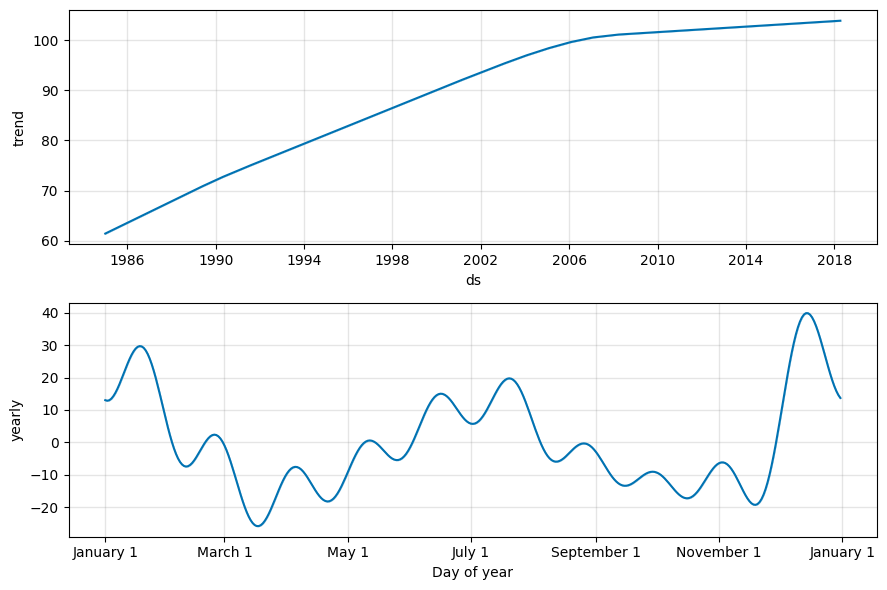

In [110]:
plt2 = m.plot_components(forecast)